# Assignment 1

## Libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

import bandit

0.0 from 100.0 Reward 0.248824 regret 0.02481728025669999 Action 11 epsilon 0.1
10.0 from 100.0 Reward 0.252946 regret 22.507630142256676 Action 5 epsilon 0.1
20.0 from 100.0 Reward 0.257093 regret 47.56135691845663 Action 19 epsilon 0.1
30.0 from 100.0 Reward 0.281424 regret 72.41469763495667 Action 1 epsilon 0.1
40.0 from 100.0 Reward 0.280207 regret 97.86137691765678 Action 1 epsilon 0.1
50.0 from 100.0 Reward 0.281244 regret 120.78325461475679 Action 1 epsilon 0.1
60.0 from 100.0 Reward 0.258228 regret 144.9784397752572 Action 3 epsilon 0.1
70.0 from 100.0 Reward 0.2415 regret 167.71302221505735 Action 30 epsilon 0.1
80.0 from 100.0 Reward 0.261181 regret 194.514342172427 Action 7 epsilon 0.1
90.0 from 100.0 Reward 0.261383 regret 220.62959706852706 Action 23 epsilon 0.1
[0.27426852298506377, 0.26341920951375003, 0.2596729776832797, 0.25082182575316886, 0.2582768302801392, 0.25816877581906256, 0.25877423543711364, 0.2560494436857142, 0.20499891210531568, 0.22916275772490555, 0.2459

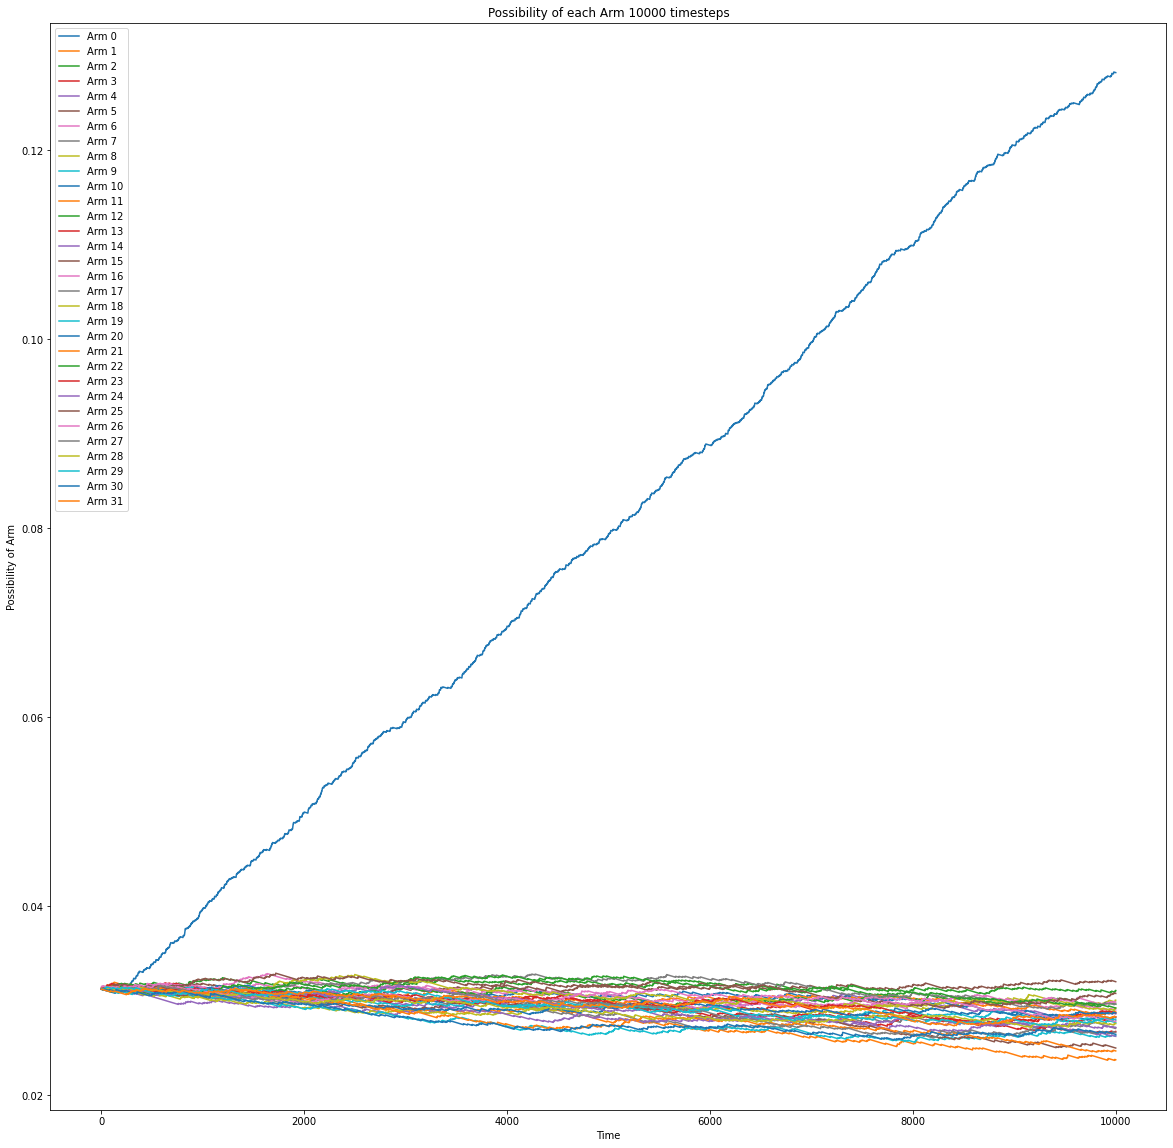

In [3]:
def main():
    # Number of steps
    timesteps = 10000
    # Import the bendit code
    b = bandit.Bandit()
    # Regrets
    regret = 0
    regrets = []
    # exploration probability
    # Greediness
    epsilon = 0.1
    # Q Value initialization
    QVal = [0] * b.num_arms()
    # Counting each move or usage of arm (This can also be use as possibility)
    ActionCount = [0] * b.num_arms()
    # Delto for updating possibility
    delta = 0.0001
    # possibility of each arm
    bandits_p = []
    # Policy initialization
    policy = []
    for i in range(b.num_arms()):
        policy.append(1/b.num_arms())
        bandits_p.append([])
    
    # for time steps
    for t in range(timesteps):
        # Choose an arm
        a = 0
        if np.random.random() >= epsilon:
            a = random.randrange(b.num_arms())
        else:
            a = QVal.index(max(QVal))
        
        # Update the policy
        if policy[a] <= (1 - delta):
            policy[a] = policy[a] + delta
            for i in range(b.num_arms()):
                if i != a:
                    if policy[i] >= (delta/(b.num_arms() - 1)):
                        policy[i] = policy[i] - (delta/(b.num_arms() - 1))

        # Save the policy for plotting
        for i in range(b.num_arms()):
            bandits_p[i].append(policy[i])

        # Pull the arm, obtain a reward
        rew = b.trigger(a)
        ActionCount[a] = ActionCount[a] + 1

        # Update the Q-Value
        QVal[a] = QVal[a] = QVal[a] + ((1 / ActionCount[a]) * (rew - QVal[a]))

        # Save the regret
        regret += b.opt() - rew
        regrets.append(regret)

        # print the data
        if (t % 1000) == 0:
            print(str(t / (timesteps/100)) + " from " + str(timesteps / (timesteps/100)) + ' Reward', rew, 'regret', regret, "Action", a+1, "epsilon", epsilon)


    print(QVal)
    # Plotting
    for i in range(b.num_arms()):
        plt.plot(bandits_p[i], label="Arm " + str(i))
    plt.xlabel('Time')
    plt.ylabel('Possibility of Arm')
    plt.title('Possibility of each Arm ' + str(timesteps) + " timesteps")
    plt.rcParams['figure.figsize'] = [20, 20]
    leg = plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

It is clear that after about timestep 1300, arm 0 is dominant. If we continue for 100000 we can see that its going to be 100%.

0.0 from 100.0 Reward 0.26339 regret 0.010251280256699968 Action 22 epsilon 0.1
10.0 from 100.0 Reward 0.260488 regret 253.68370024853616 Action 3 epsilon 0.1
20.0 from 100.0 Reward 0.255369 regret 502.9124283509357 Action 16 epsilon 0.1
30.0 from 100.0 Reward 0.259823 regret 752.4392231399514 Action 23 epsilon 0.1
40.0 from 100.0 Reward 0.250774 regret 1003.7249942327921 Action 31 epsilon 0.1
50.0 from 100.0 Reward 0.28086 regret 1247.0734059815748 Action 1 epsilon 0.1
60.0 from 100.0 Reward 0.261491 regret 1488.7842344183678 Action 3 epsilon 0.1
70.0 from 100.0 Reward 0.263561 regret 1739.604474407264 Action 4 epsilon 0.1
80.0 from 100.0 Reward 0.26052 regret 1988.8041991078287 Action 8 epsilon 0.1
90.0 from 100.0 Reward 0.251145 regret 2237.2037270904016 Action 28 epsilon 0.1
[0.273219338446338, 0.26263856269556507, 0.25197266790874506, 0.25670807185862005, 0.25550713735460423, 0.25832983706084983, 0.2537284158139202, 0.2565140884691658, 0.20361475467767032, 0.2294008338056526, 0.24

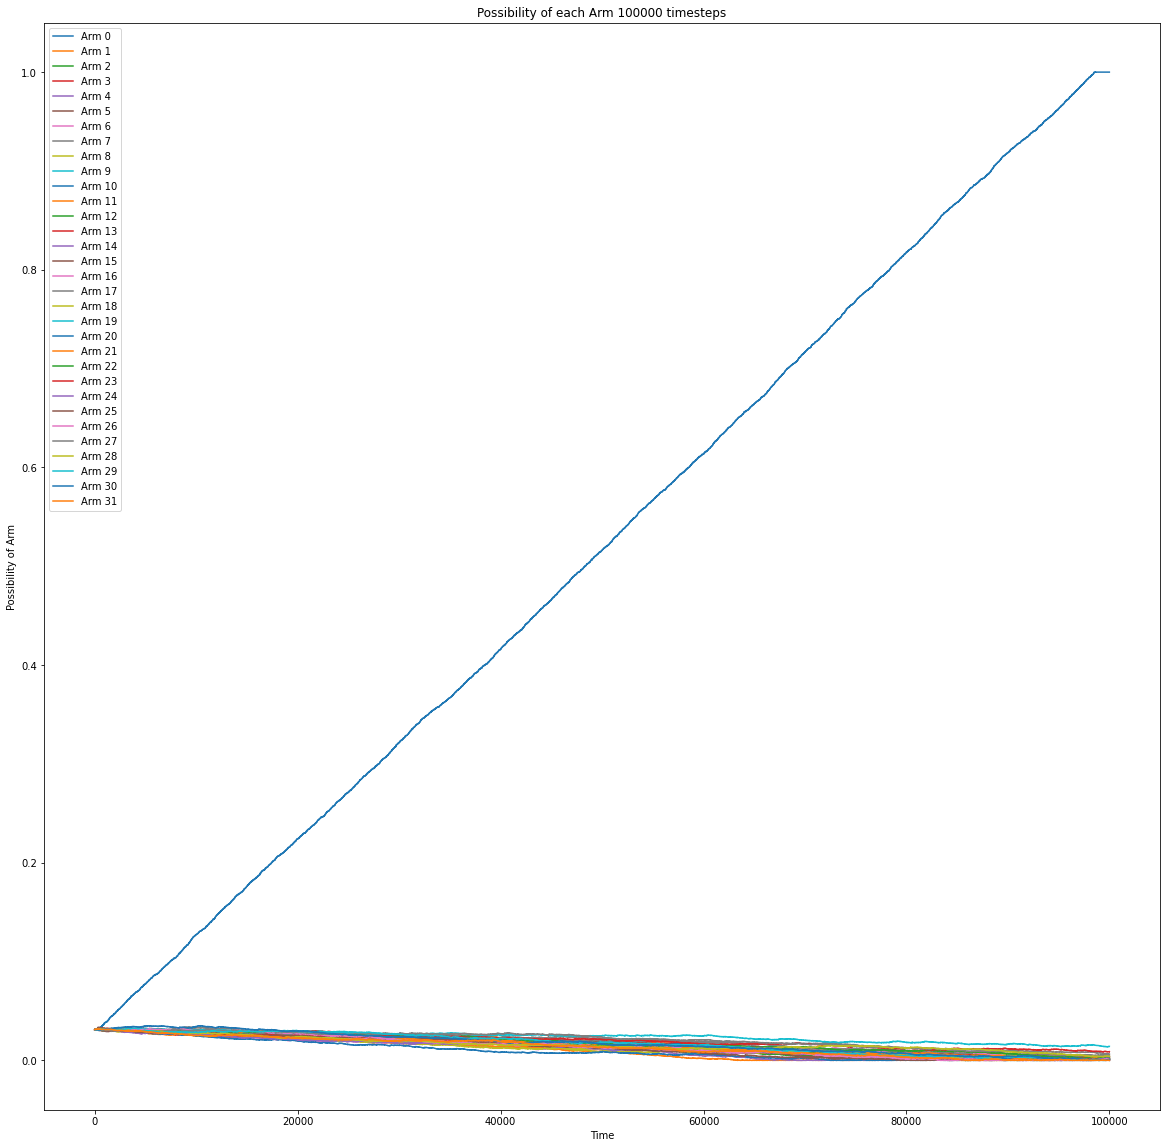

In [4]:
def main():
    # Number of steps
    timesteps = 100000
    # Import the bendit code
    b = bandit.Bandit()
    # Regrets
    regret = 0
    regrets = []
    # exploration probability
    # Greediness
    epsilon = 0.1
    # Q Value initialization
    QVal = [0] * b.num_arms()
    # Counting each move or usage of arm (This can also be use as possibility)
    ActionCount = [0] * b.num_arms()
    # Delta for updating possibility
    delta = 0.0001
    # possibility of each arm
    bandits_p = []
    # Policy initialization
    policy = []
    for i in range(b.num_arms()):
        policy.append(1/b.num_arms())
        bandits_p.append([])
    
    # for time steps
    for t in range(timesteps):
        # Choose an arm
        a = 0
        if np.random.random() >= epsilon:
            a = random.randrange(b.num_arms())
        else:
            a = QVal.index(max(QVal))
        
        # Update the policy
        if policy[a] <= (1 - delta):
            policy[a] = policy[a] + delta
            for i in range(b.num_arms()):
                if i != a:
                    if policy[i] >= (delta/(b.num_arms() - 1)):
                        policy[i] = policy[i] - (delta/(b.num_arms() - 1))

        # Save the policy for plotting
        for i in range(b.num_arms()):
            bandits_p[i].append(policy[i])

        # Pull the arm, obtain a reward
        rew = b.trigger(a)
        ActionCount[a] = ActionCount[a] + 1

        # Update the Q-Value
        QVal[a] = QVal[a] = QVal[a] + ((1 / ActionCount[a]) * (rew - QVal[a]))

        # Save the regret
        regret += b.opt() - rew
        regrets.append(regret)

        # print the data
        if (t % 10000) == 0:
            print(str(t / (timesteps/100)) + " from " + str(timesteps / (timesteps/100)) + ' Reward', rew, 'regret', regret, "Action", a+1, "epsilon", epsilon)


    print(QVal)
    # Plotting
    for i in range(b.num_arms()):
        plt.plot(bandits_p[i], label="Arm " + str(i))
    plt.xlabel('Time')
    plt.ylabel('Possibility of Arm')
    plt.title('Possibility of each Arm ' + str(timesteps) + " timesteps")
    plt.rcParams['figure.figsize'] = [20, 20]
    leg = plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

We can also try with the counting of the arms divided by current time step that are used:

0.0 from 100.0 Reward 0.280077 regret -0.006435719743300039 Action 1 epsilon 0.1
50.0 from 100.0 Reward 0.269697 regret 240.31163919505607 Action 2 epsilon 0.1
[0.27368897396178454, 0.2654627642250003, 0.25343928302446783, 0.2574199745335677, 0.25682349545649685, 0.2598677776119729, 0.2561056342102968, 0.2577434985448631, 0.2037628842605913, 0.23129006551266215, 0.24432119024945262, 0.24447466560391046, 0.2248516433761484, 0.2373250183321904, 0.24546914082969934, 0.24878580607762235, 0.251195086649653, 0.26221129373820995, 0.2526503414939651, 0.2538736163500002, 0.25527317499151275, 0.2585787264441556, 0.25551238007300153, 0.25448711318798, 0.2168770533731205, 0.23484448349733117, 0.24240619231909916, 0.24699030237086322, 0.23105349016690402, 0.2408970852168126, 0.24514300342589093, 0.2466618740321492]


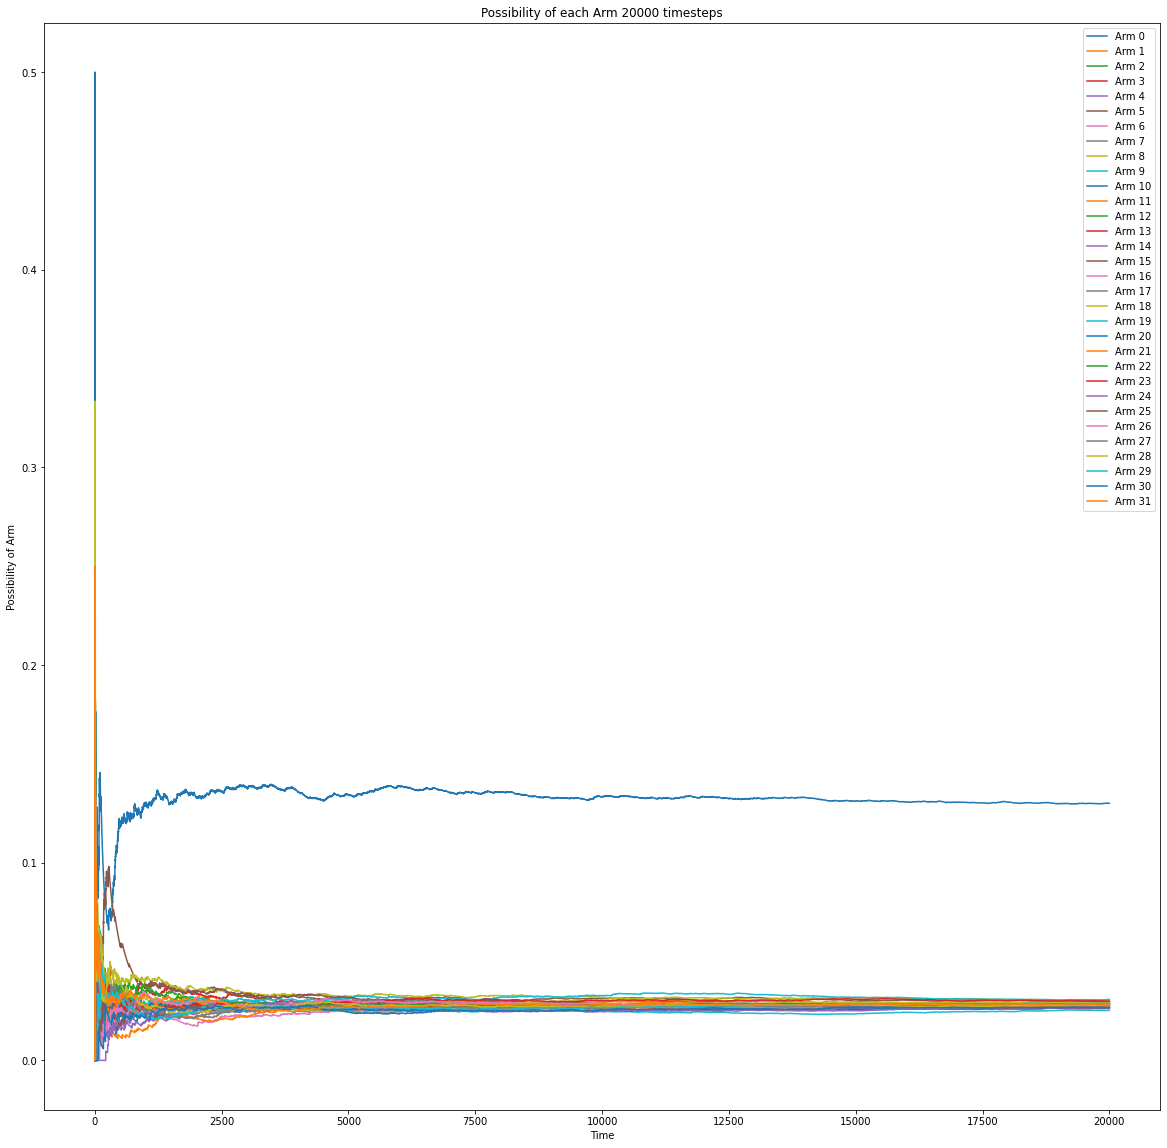

In [5]:
def main():
    # Number of steps
    timesteps = 20000
    # Import the bendit code
    b = bandit.Bandit()
    # Regrets
    regret = 0
    regrets = []
    # exploration probability
    # Greediness
    epsilon = 0.1
    # Q Value initialization
    QVal = [0] * b.num_arms()
    # Counting each move or usage of arm (This can also be use as possibility)
    ActionCount = [0] * b.num_arms()
    # possibility of each arm
    bandits_p = []

    # for time steps
    for t in range(timesteps):
        # Choose an arm
        a = 0
        if np.random.random() >= epsilon:
            a = random.randrange(b.num_arms())
        else:
            a = QVal.index(max(QVal))
            
        for i in range(b.num_arms()):
            bandits_p.append([0])
        
        for i in range(b.num_arms()):
            bandits_p[i].append(ActionCount[i]/(t+1))

        # Pull the arm, obtain a reward
        rew = b.trigger(a)
        ActionCount[a] = ActionCount[a] + 1

        # Update the Q-Value
        QVal[a] = QVal[a] = QVal[a] + ((1 / ActionCount[a]) * (rew - QVal[a]))

        # Save the regret
        regret += b.opt() - rew
        regrets.append(regret)

        # print the data
        if (t % 10000) == 0:
            print(str(t / (timesteps/100)) + " from " + str(timesteps / (timesteps/100)) + ' Reward', rew, 'regret', regret, "Action", a+1, "epsilon", epsilon)


    print(QVal)
    # Plotting
    for i in range(b.num_arms()):
        plt.plot(bandits_p[i], label="Arm " + str(i))
    plt.xlabel('Time')
    plt.ylabel('Possibility of Arm')
    plt.title('Possibility of each Arm ' + str(timesteps) + " timesteps")
    plt.rcParams['figure.figsize'] = [20, 20]
    leg = plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

It's again visible that Arm 0 is the optimal choice and it's visible from timestep about 1500.

Now we are trying with epsilon decay.

0.0 from 100.0 Reward 0.278471 regret -0.004829719743300043 Action 1 epsilon 0.9999
10.0 from 100.0 Reward 0.252647 regret 107.08410424875639 Action 28 epsilon 0.3678242603283259
20.0 from 100.0 Reward 0.261613 regret 320.1042779017751 Action 8 epsilon 0.13530821730781062
30.0 from 100.0 Reward 0.261728 regret 568.2974569868555 Action 5 epsilon 0.1
40.0 from 100.0 Reward 0.258196 regret 810.7541650166212 Action 17 epsilon 0.1
50.0 from 100.0 Reward 0.24772 regret 1054.9784901964365 Action 14 epsilon 0.1
60.0 from 100.0 Reward 0.261417 regret 1304.2667900401536 Action 21 epsilon 0.1
70.0 from 100.0 Reward 0.282116 regret 1556.8616486884114 Action 1 epsilon 0.1
80.0 from 100.0 Reward 0.254105 regret 1805.1562234733815 Action 32 epsilon 0.1
90.0 from 100.0 Reward 0.257259 regret 2052.135655781079 Action 17 epsilon 0.1
[0.27364765792368656, 0.26352794405325186, 0.25388814962461415, 0.25542180499559936, 0.2565308467952936, 0.25886693125408944, 0.2545227708803909, 0.255898916122795, 0.203500

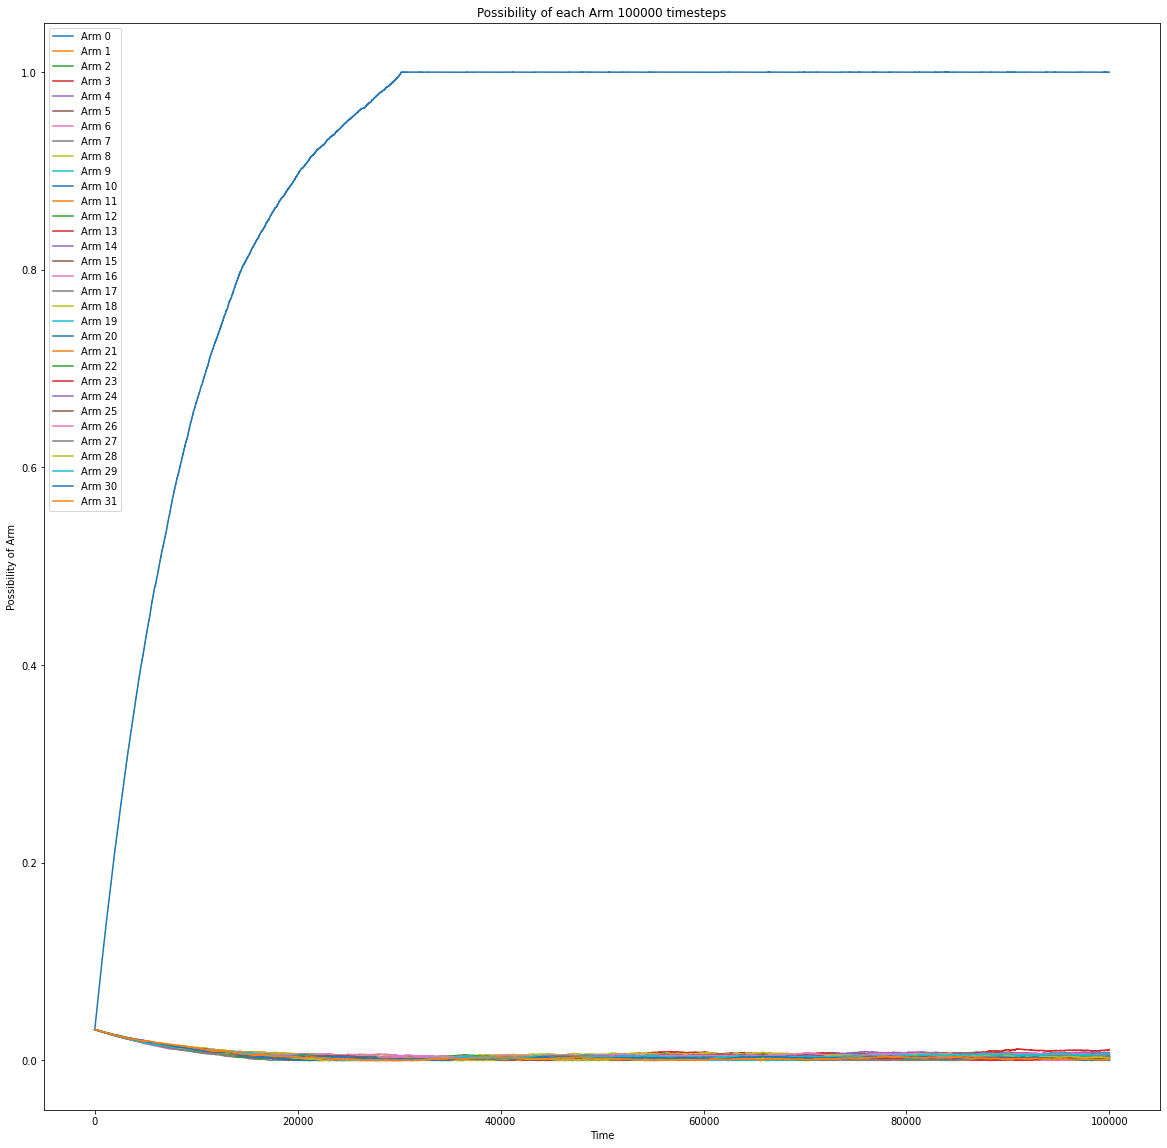

In [6]:
def main():
    # Number of steps
    timesteps = 100000
    # Import the bendit code
    b = bandit.Bandit()
    # Regrets
    regret = 0
    regrets = []
    # exploration probability
    # Greediness
    epsilon = 1
    decay = 0.9999
    min_epsilon = 0.1
    # Q Value initialization
    QVal = [0] * b.num_arms()
    # Counting each move or usage of arm (This can also be use as possibility)
    ActionCount = [0] * b.num_arms()
    # Delta for updating possibility
    delta = 0.0001
    # possibility of each arm
    bandits_p = []
    # Policy initialization
    policy = []
    for i in range(b.num_arms()):
        policy.append(1/b.num_arms())
        bandits_p.append([])
    
    # for time steps
    for t in range(timesteps):
        # Choose an arm
        a = 0
        if np.random.random() >= epsilon:
            a = random.randrange(b.num_arms())
        else:
            a = QVal.index(max(QVal))
        
        # Update the policy
        if policy[a] <= (1 - delta):
            policy[a] = policy[a] + delta
            for i in range(b.num_arms()):
                if i != a:
                    if policy[i] >= (delta/(b.num_arms() - 1)):
                        policy[i] = policy[i] - (delta/(b.num_arms() - 1))

        # Save the policy for plotting
        for i in range(b.num_arms()):
            bandits_p[i].append(policy[i])

        # Pull the arm, obtain a reward
        rew = b.trigger(a)
        ActionCount[a] = ActionCount[a] + 1

        # Update the Q-Value
        QVal[a] = QVal[a] = QVal[a] + ((1 / ActionCount[a]) * (rew - QVal[a]))

        # Save the regret
        regret += b.opt() - rew
        regrets.append(regret)
        
        # updating epsilon
        epsilon = max([min_epsilon, epsilon * decay])

        # print the data
        if (t % 10000) == 0:
            print(str(t / (timesteps/100)) + " from " + str(timesteps / (timesteps/100)) + ' Reward', rew, 'regret', regret, "Action", a+1, "epsilon", epsilon)


    print(QVal)
    # Plotting
    for i in range(b.num_arms()):
        plt.plot(bandits_p[i], label="Arm " + str(i))
    plt.xlabel('Time')
    plt.ylabel('Possibility of Arm')
    plt.title('Possibility of each Arm ' + str(timesteps) + " timesteps")
    plt.rcParams['figure.figsize'] = [20, 20]
    leg = plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

This technique is works extremly better and it will be obvious from almost 0. You can see more details in next part with 1000 timesteps.

0.0 from 100.0 Reward 0.279867 regret -0.0062257197432999956 Action 1 epsilon 0.9999
[0.2719012937967708, 0, 0.2619453333333333, 0, 0.260711, 0.2645485, 0.2629375, 0.26154333333333335, 0.14253768143333334, 0.238602, 0.24865633333333334, 0, 0.237646, 0, 0, 0.253421, 0, 0.26510449999999997, 0.264337, 0.26163633333333336, 0, 0.261581, 0.260492, 0.26067799999999997, 0.172243, 0.12099903585, 0.248375, 0.2527755, 0.235127, 0, 0, 0]


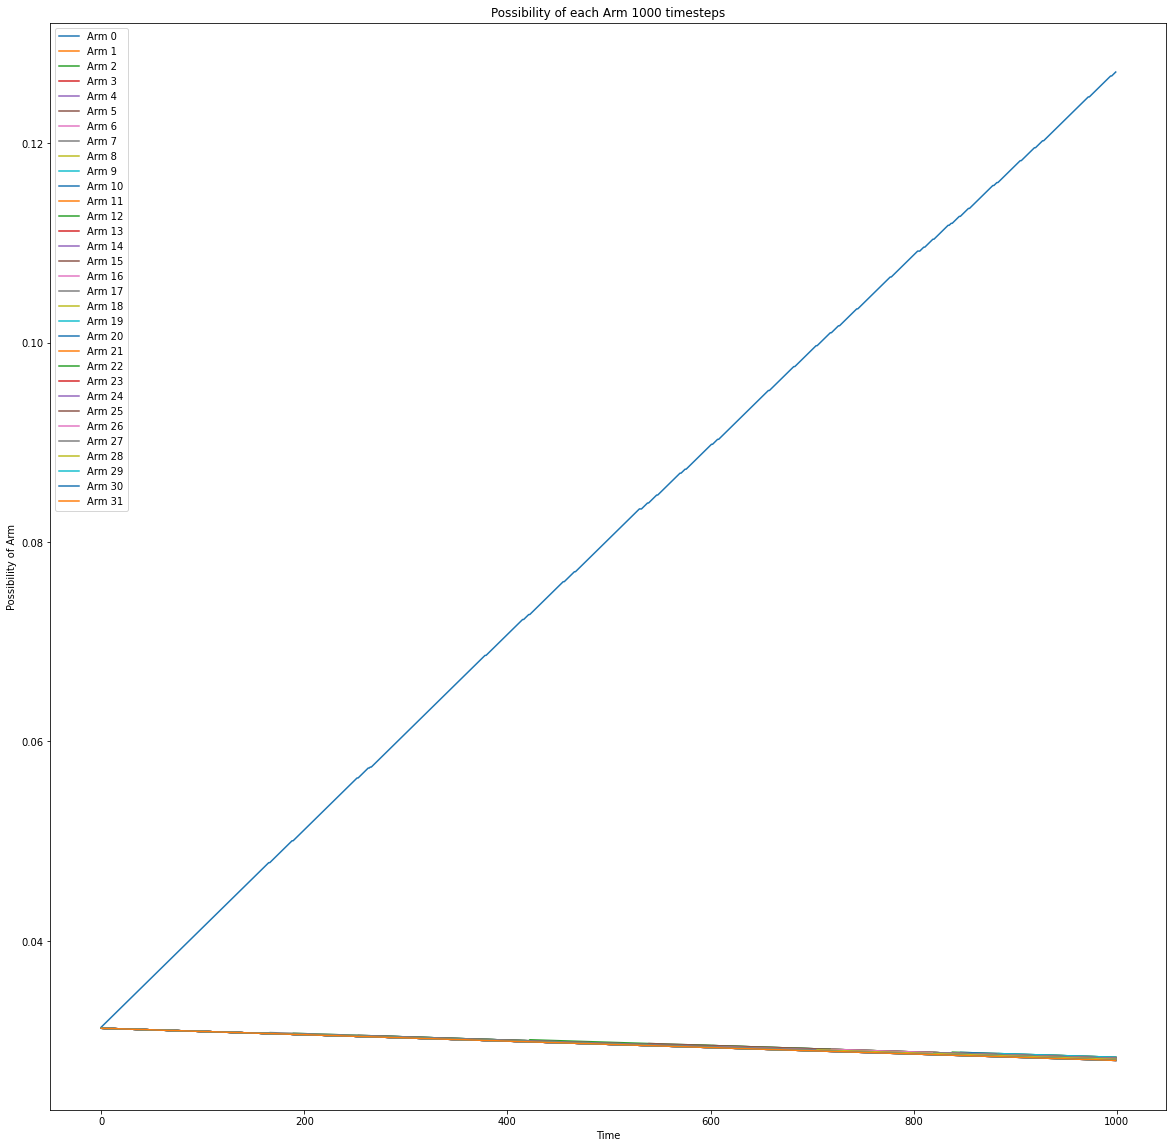

In [7]:
def main():
    # Number of steps
    timesteps = 1000
    # Import the bendit code
    b = bandit.Bandit()
    # Regrets
    regret = 0
    regrets = []
    # exploration probability
    # Greediness
    epsilon = 1
    decay = 0.9999
    min_epsilon = 0.1
    # Q Value initialization
    QVal = [0] * b.num_arms()
    # Counting each move or usage of arm (This can also be use as possibility)
    ActionCount = [0] * b.num_arms()
    # Delta for updating possibility
    delta = 0.0001
    # possibility of each arm
    bandits_p = []
    # Policy initialization
    policy = []
    for i in range(b.num_arms()):
        policy.append(1/b.num_arms())
        bandits_p.append([])
    
    # for time steps
    for t in range(timesteps):
        # Choose an arm
        a = 0
        if np.random.random() >= epsilon:
            a = random.randrange(b.num_arms())
        else:
            a = QVal.index(max(QVal))
        
        # Update the policy
        if policy[a] <= (1 - delta):
            policy[a] = policy[a] + delta
            for i in range(b.num_arms()):
                if i != a:
                    if policy[i] >= (delta/(b.num_arms() - 1)):
                        policy[i] = policy[i] - (delta/(b.num_arms() - 1))

        # Save the policy for plotting
        for i in range(b.num_arms()):
            bandits_p[i].append(policy[i])

        # Pull the arm, obtain a reward
        rew = b.trigger(a)
        ActionCount[a] = ActionCount[a] + 1

        # Update the Q-Value
        QVal[a] = QVal[a] = QVal[a] + ((1 / ActionCount[a]) * (rew - QVal[a]))

        # Save the regret
        regret += b.opt() - rew
        regrets.append(regret)
        
        # updating epsilon
        epsilon = max([min_epsilon, epsilon * decay])

        # print the data
        if (t % 10000) == 0:
            print(str(t / (timesteps/100)) + " from " + str(timesteps / (timesteps/100)) + ' Reward', rew, 'regret', regret, "Action", a+1, "epsilon", epsilon)


    print(QVal)
    # Plotting
    for i in range(b.num_arms()):
        plt.plot(bandits_p[i], label="Arm " + str(i))
    plt.xlabel('Time')
    plt.ylabel('Possibility of Arm')
    plt.title('Possibility of each Arm ' + str(timesteps) + " timesteps")
    plt.rcParams['figure.figsize'] = [20, 20]
    leg = plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

So it is visible even from start. And now we can see the counting of each arm divided by current time step.

0.0 from 100.0 Reward 0.282303 regret -0.008661719743300045 Action 1 epsilon 0.9999
3.3333333333333335 from 100.0 Reward 0.248929 regret 103.33248812017708 Action 12 epsilon 0.3678242603283259
6.666666666666667 from 100.0 Reward 0.259193 regret 315.80664676222665 Action 19 epsilon 0.13530821730781062
10.0 from 100.0 Reward 0.226668 regret 560.9549446525247 Action 25 epsilon 0.1
13.333333333333334 from 100.0 Reward 0.280662 regret 811.7493752142112 Action 1 epsilon 0.1
16.666666666666668 from 100.0 Reward 0.248771 regret 1050.0901707269304 Action 11 epsilon 0.1
20.0 from 100.0 Reward 0.24972 regret 1303.761727703833 Action 27 epsilon 0.1
23.333333333333332 from 100.0 Reward 0.212192 regret 1545.2542305945312 Action 9 epsilon 0.1
26.666666666666668 from 100.0 Reward 0.223954 regret 1798.5740464438304 Action 25 epsilon 0.1
30.0 from 100.0 Reward 0.264105 regret 2042.0594561522541 Action 20 epsilon 0.1
33.333333333333336 from 100.0 Reward 0.247352 regret 2288.202132278954 Action 30 epsilon

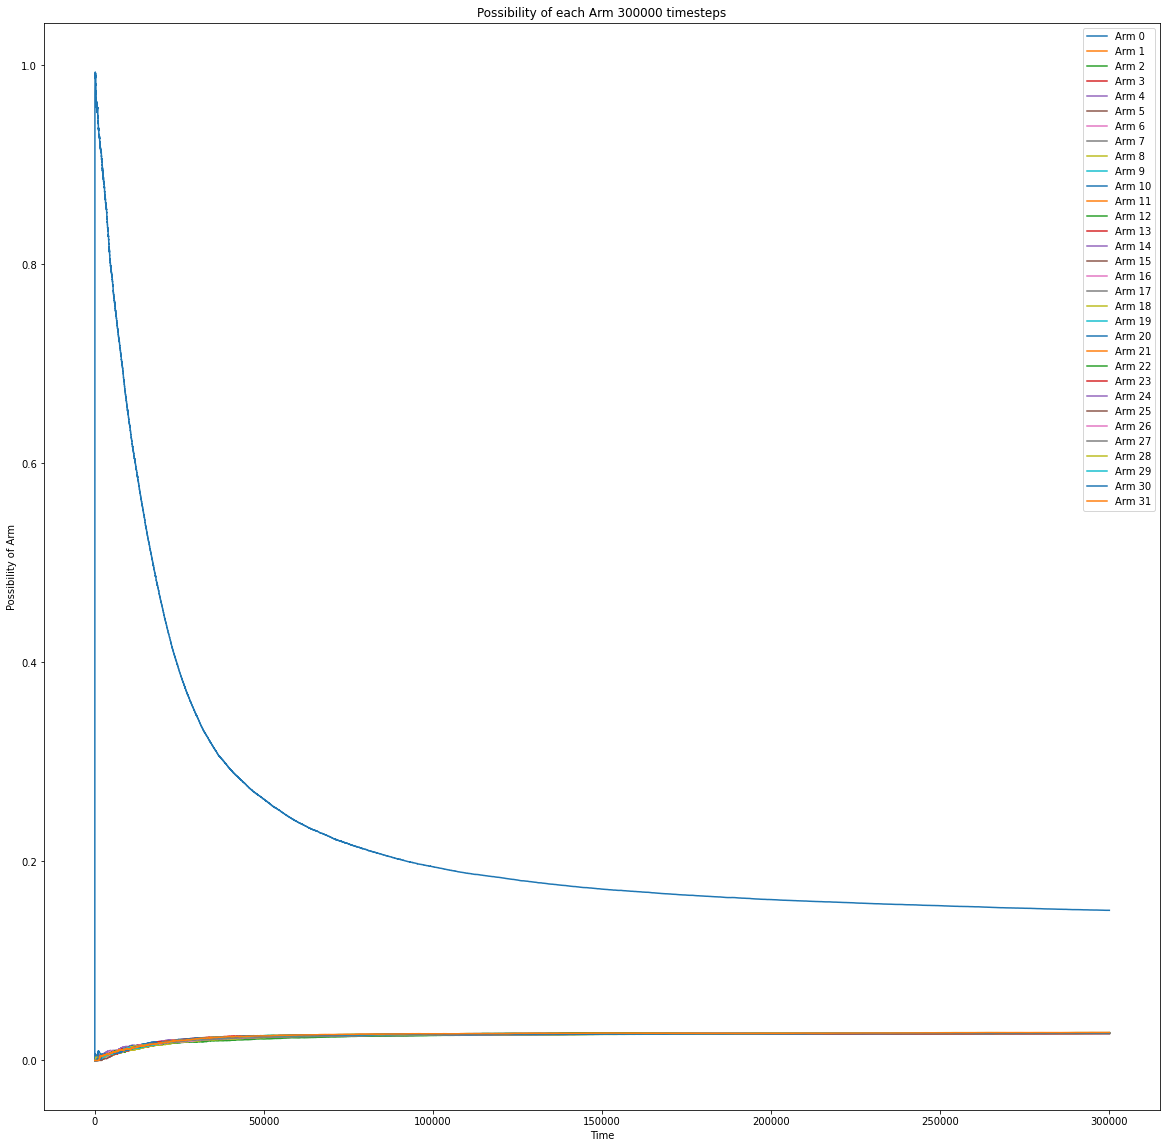

In [8]:
def main():
    # Number of steps
    timesteps = 300000
    # Import the bendit code
    b = bandit.Bandit()
    # Regrets
    regret = 0
    regrets = []
    # exploration probability
    # Greediness
    epsilon = 1
    decay = 0.9999
    min_epsilon = 0.1
    # Q Value initialization
    QVal = [0] * b.num_arms()
    # Counting each move or usage of arm (This can also be use as possibility)
    ActionCount = [0] * b.num_arms()
    # possibility of each arm
    bandits_p = []

    # for time steps
    for t in range(timesteps):
        # Choose an arm
        a = 0
        if np.random.random() >= epsilon:
            a = random.randrange(b.num_arms())
        else:
            a = QVal.index(max(QVal))
            
        for i in range(b.num_arms()):
            bandits_p.append([0])
        
        for i in range(b.num_arms()):
            bandits_p[i].append(ActionCount[i]/(t+1))

        # Pull the arm, obtain a reward
        rew = b.trigger(a)
        ActionCount[a] = ActionCount[a] + 1

        # Update the Q-Value
        QVal[a] = QVal[a] = QVal[a] + ((1 / ActionCount[a]) * (rew - QVal[a]))

        # Save the regret
        regret += b.opt() - rew
        regrets.append(regret)
        
        # updating epsilon
        epsilon = max([min_epsilon, epsilon * decay])

        # print the data
        if (t % 10000) == 0:
            print(str(t / (timesteps/100)) + " from " + str(timesteps / (timesteps/100)) + ' Reward', rew, 'regret', regret, "Action", a+1, "epsilon", epsilon)


    print(QVal)
    # Plotting
    for i in range(b.num_arms()):
        plt.plot(bandits_p[i], label="Arm " + str(i))
    plt.xlabel('Time')
    plt.ylabel('Possibility of Arm')
    plt.title('Possibility of each Arm ' + str(timesteps) + " timesteps")
    plt.rcParams['figure.figsize'] = [20, 20]
    leg = plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

It's again obvious the Arm 0 is dominant from the begining and the prossibility of Arm 0 converges.

We can see the rewards and regrets as well.

0.0 from 100.0 Reward 0.279702 regret -0.006060719743300025 Action 1 epsilon 0.999
1.0 from 100.0 Reward 0.258653 regret 230.9971812439572 Action 19 epsilon 0.1
2.0 from 100.0 Reward 0.252069 regret 475.9052512262603 Action 28 epsilon 0.1
3.0 from 100.0 Reward 0.251176 regret 719.650557362236 Action 12 epsilon 0.1
4.0 from 100.0 Reward 0.232272 regret 965.0625926494015 Action 13 epsilon 0.1
5.0 from 100.0 Reward 0.243962 regret 1205.7699315467032 Action 14 epsilon 0.1
6.0 from 100.0 Reward 0.25188 regret 1456.0607771350296 Action 16 epsilon 0.1
7.0 from 100.0 Reward 0.250493 regret 1710.0168637595325 Action 27 epsilon 0.1
8.0 from 100.0 Reward 0.249268 regret 1957.7563063412804 Action 27 epsilon 0.1
9.0 from 100.0 Reward 0.279253 regret 2195.5832923480857 Action 1 epsilon 0.1
10.0 from 100.0 Reward 0.279931 regret 2446.1650218696914 Action 1 epsilon 0.1
11.0 from 100.0 Reward 3.01702e-05 regret 2692.1368115407804 Action 16 epsilon 0.1
12.0 from 100.0 Reward 0.281149 regret 2931.8637082

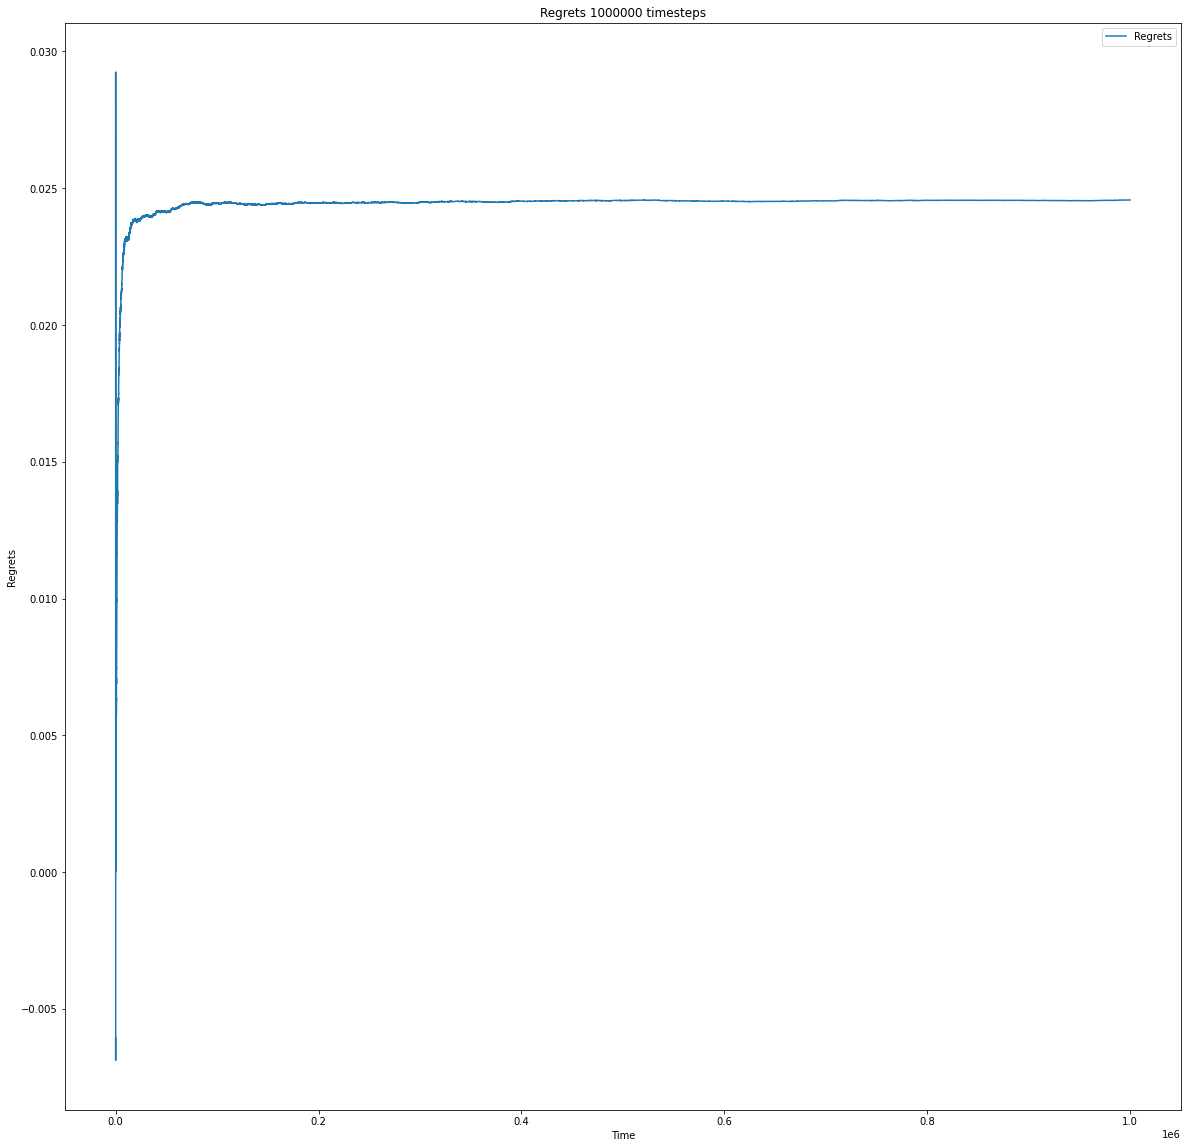

In [15]:
def main():
    # Number of steps
    timesteps = 1000000
    # Import the bendit code
    b = bandit.Bandit()
    # Regrets
    regret = 0
    regrets = []
    # exploration probability
    # Greediness
    epsilon = 1
    decay = 0.999
    min_epsilon = 0.1
    # Q Value initialization
    QVal = [0] * b.num_arms()
    # Counting each move or usage of arm (This can also be use as possibility)
    ActionCount = [0] * b.num_arms()
    # Delta for updating possibility
    delta = 0.0001
    # possibility of each arm
    bandits_p = []
    # Policy initialization
    policy = []
    for i in range(b.num_arms()):
        policy.append(1/b.num_arms())
        bandits_p.append([])
    
    # for time steps
    for t in range(timesteps):
        # Choose an arm
        a = 0
        if np.random.random() >= epsilon:
            a = random.randrange(b.num_arms())
        else:
            a = QVal.index(max(QVal))
        
        # Update the policy
        if policy[a] <= (1 - delta):
            policy[a] = policy[a] + delta
            for i in range(b.num_arms()):
                if i != a:
                    if policy[i] >= (delta/(b.num_arms() - 1)):
                        policy[i] = policy[i] - (delta/(b.num_arms() - 1))

        # Save the policy for plotting
        for i in range(b.num_arms()):
            bandits_p[i].append(policy[i])

        # Pull the arm, obtain a reward
        rew = b.trigger(a)
        ActionCount[a] = ActionCount[a] + 1

        # Update the Q-Value
        QVal[a] = QVal[a] = QVal[a] + ((1 / ActionCount[a]) * (rew - QVal[a]))

        # Save the regret
        regret += b.opt() - rew
        regrets.append(regret/(t+1))
        
        # updating epsilon
        epsilon = max([min_epsilon, epsilon * decay])

        # print the data
        if (t % 10000) == 0:
            print(str(t / (timesteps/100)) + " from " + str(timesteps / (timesteps/100)) + ' Reward', rew, 'regret', regret, "Action", a+1, "epsilon", epsilon)


    print(QVal)
    # Plotting
    plt.plot(regrets, label="Regrets")
    plt.xlabel('Time')
    plt.ylabel('Regrets')
    plt.title('Regrets ' + str(timesteps) + " timesteps")
    plt.rcParams['figure.figsize'] = [20, 20]
    leg = plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

And again from 15000 to 20000 the groth of regret is linear and the average is not changing.